<a href="https://colab.research.google.com/github/AadityanshuAbhinav/Automobile-Fuel-Efficiency-Prediction-using-Deep-Learning/blob/main/Colab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from keras import layers
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [12]:
# Load and inspect dataset
df = pd.read_csv('auto-mpg.csv')
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
df['horsepower'].unique()

    mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70
(398, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [16]:
# Clean data
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)
# df['horsepower']=df['horsepower'].astype(int)
# df.isnull().sum()
# df.nunique()
# Convert horsepower to numeric, handling errors
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
# Fill missing values (NaN) in horsepower with 0
df['horsepower'] = df['horsepower'].fillna(0)
df['horsepower'] = df['horsepower'].astype(int) # Now convert to int
print(df.isnull().sum())
print(df.nunique())

(398, 7)
(398, 7)
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
dtype: int64
mpg             129
cylinders         5
displacement     82
horsepower        1
weight          351
acceleration     95
model-year       13
dtype: int64


Column 'origin' not found in DataFrame.


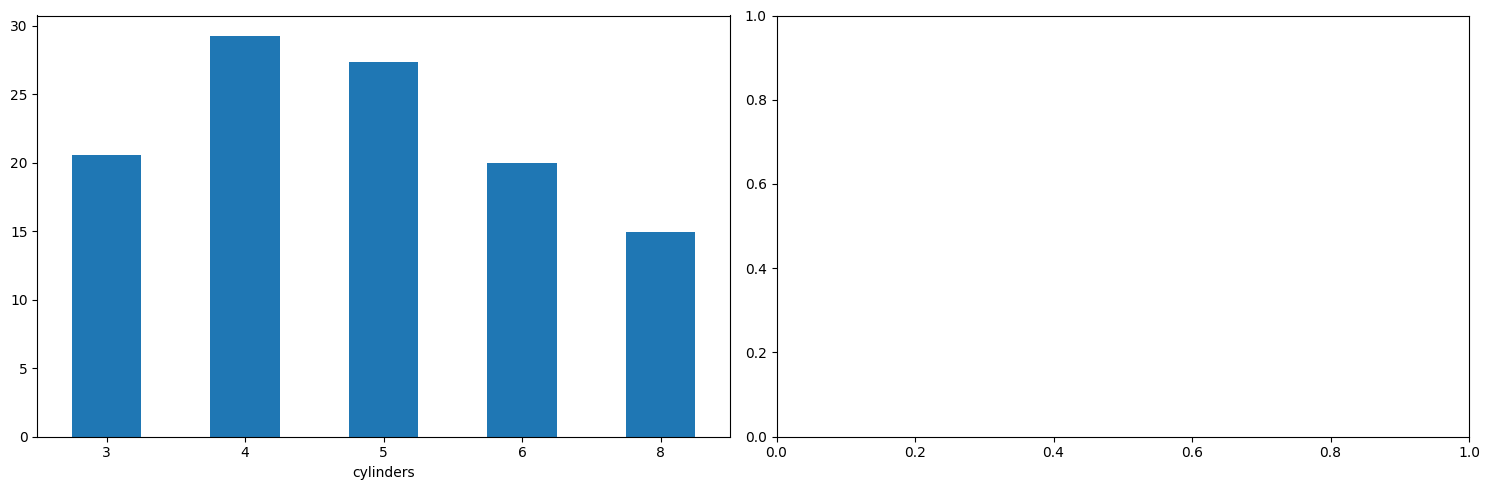

In [17]:
# Visualize average MPG by cylinders and origin
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['cylinders', 'origin']):
	plt.subplot(1, 2, i + 1)
	# Check if the column exists before grouping
	if col in df.columns:
		df.groupby(col).mean()['mpg'].plot.bar()
		plt.xticks(rotation=0)
	else:
		print(f"Column '{col}' not found in DataFrame.")
plt.tight_layout()
plt.show()

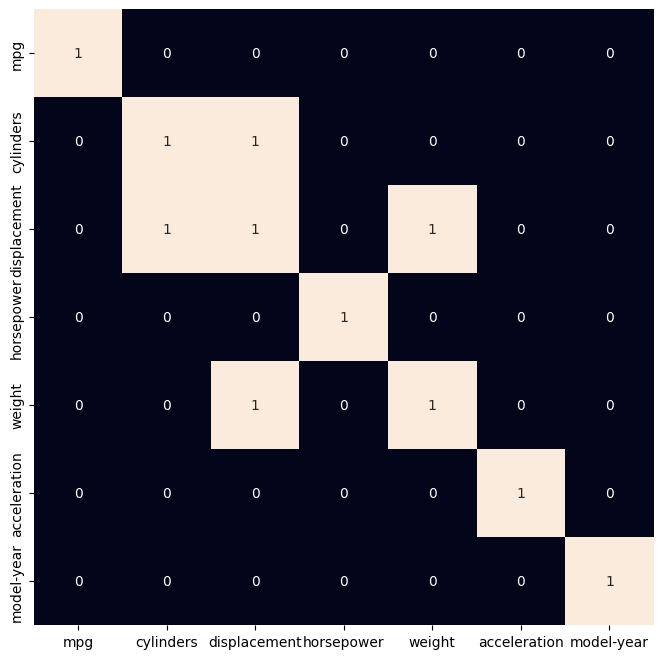

In [9]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [18]:
# Drop less significant feature
df.drop('displacement', axis=1, inplace=True)


In [20]:
from sklearn.model_selection import train_test_split
# Split data into features and target
features = df.drop(['mpg'], axis=1)
target = df['mpg'].values
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
print(X_train.shape, X_val.shape)

(318, 5) (80, 5)


In [21]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .batch(32)
    .prefetch(AUTO)
)


In [41]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[features.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='relu')
])
model.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mape']
)
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               1536      
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 1)                

In [42]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)


Epoch 1/50
10/10 [==============================] - 1s 23ms/step - loss: 21.1304 - mape: 92.3481 - val_loss: 24.0625 - val_mape: 100.0000
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 18.4794 - mape: 83.3591 - val_loss: 24.0625 - val_mape: 100.0000
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 17.0333 - mape: 78.3508 - val_loss: 24.0625 - val_mape: 100.0000
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 15.7401 - mape: 73.8050 - val_loss: 24.0625 - val_mape: 100.0000
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 14.3832 - mape: 69.0818 - val_loss: 24.0625 - val_mape: 100.0000
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 13.1940 - mape: 64.7806 - val_loss: 24.0625 - val_mape: 100.0000
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 12.1569 - mape: 61.0818 - val_loss: 23.5149 - val_mape: 98.3290
Epoch 8/50
10/10 [=======================

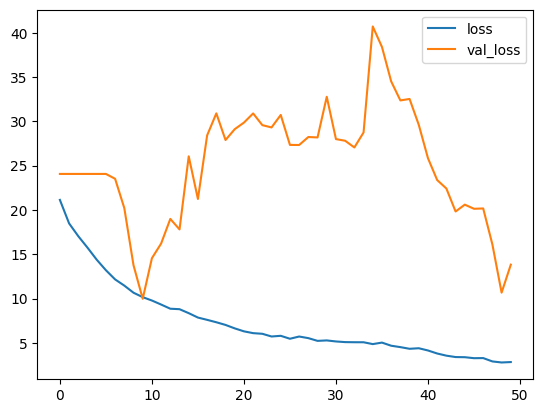

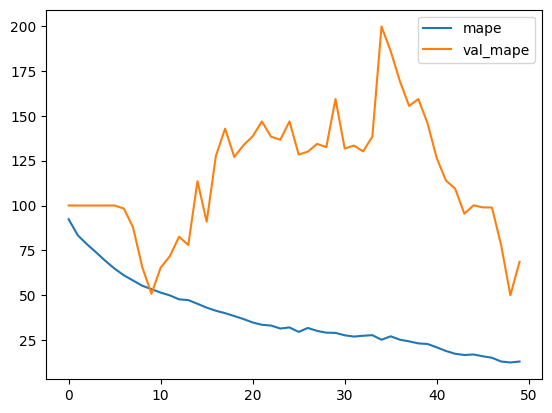

In [43]:
history_df = pd.DataFrame(history.history)
history_df.head()
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()


In [44]:
# Example new data
new_data = pd.DataFrame({
    'cylinders': [4, 6, 8],
    'displacement': [140.0, 250.0, 350.0],
    'horsepower': [90, 180, 210],
    'weight': [2800, 3200, 3600],
    'acceleration': [15.0, 12.0, 11.0],
    'model-year': [82, 76, 79],
})

In [52]:
print("New data: ", new_data)

New data:     cylinders  displacement  horsepower  weight  acceleration  model-year
0          4         140.0          90    2800          15.0          82
1          6         250.0         180    3200          12.0          76
2          8         350.0         210    3600          11.0          79


In [45]:
# Ensure the new data has the same preprocessing as the training data
new_data['horsepower'] = new_data['horsepower'].replace('?', np.nan).astype(float).fillna(0).astype(int)


In [46]:
# Convert the DataFrame to a NumPy array
new_data_array = new_data.to_numpy()

In [48]:
# Drop the 'model-year' column as it might not be used in training
new_data_array = new_data.drop('displacement', axis=1).to_numpy()

# Make predictions
predictions = model.predict(new_data_array)


1/1 [==============================] - 0s 127ms/step


In [49]:
# Display the predictions
print("Predicted mpg values:", predictions.flatten())

Predicted mpg values: [32.2131   15.704061  7.122144]
